In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns 
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pydot
import graphviz 
from keras.layers import Dense
import warnings
from keras.models import Sequential
from sklearn.decomposition import PCA
from keras.utils import np_utils
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

# Tratamento e manipulação dos dados

In [2]:
dfs = pd.read_html('https://www.worldfootball.net/schedule/bra-serie-a-2013-spieltag/1/', header =None)
df = dfs[1]
for j in range(3,10):
    for i in range(1,39):
        dfs = pd.read_html(f'https://www.worldfootball.net/schedule/bra-serie-a-201{j}-spieltag/{i}/', header =None)
        df = pd.concat([df,dfs[1]])

In [3]:
df

,0,1,2,3,4,5,6
0,25/05/2013,22:30,Vasco da Gama,-,Portuguesa - SP,1:0 (0:0),NaN
1,NaN,22:30,Vitória - BA,-,Internacional,2:2 (2:1),NaN
2,26/05/2013,01:00,Corinthians SP,-,Botafogo - RJ,1:1 (0:1),NaN
3,NaN,20:00,Grêmio Porto Alegre,-,Náutico - PE,2:0 (1:0),NaN
4,NaN,20:00,Ponte Preta,-,São Paulo FC,0:2 (0:2),NaN
...,...,...,...,...,...,...,...
5,NaN,19:00,Vasco da Gama,-,Chapecoense,1:1 (0:0),NaN
6,NaN,19:00,Botafogo - RJ,-,Ceará - CE,1:1 (1:0),NaN
7,NaN,19:00,Avaí - SC,-,Athletico Paranaense,0:0 (0:0),NaN
8,NaN,19:00,Goiás,-,Grêmio Porto Alegre,3:2 (2:2),NaN


In [4]:
df.drop([0,1,3,6], inplace=True, axis=1)

In [5]:
df.rename(index=int, columns={2:'Time_casa',4:'Time_visitante',5:'Placar'},inplace=True)

In [6]:
aux = df['Placar'].str.split(':', n = 1, expand = True)
aux[2] = aux[1].str.split('(').str[0]
aux.drop([1], inplace=True, axis=1)

In [7]:
df['Placar_mand'] = aux[0]
df['Placar_visit'] = aux[2]

In [8]:
df.drop(['Placar'], inplace=True, axis=1)

In [9]:
#pd.set_option('display.max_rows', None)
df = df.tail(-10)

In [10]:
#pd.set_option('display.max_rows', None)
df['Temporada'] = 0
df.iloc[0:380,4] = 2013
df.iloc[380:760,4] = 2014
df.iloc[760:1140,4] = 2015
df.iloc[1140:1520,4] = 2016
df.iloc[1520:1900,4] = 2017
df.iloc[1900:2280,4] = 2018
df.iloc[2280:2660,4] = 2019

In [11]:
df['Placar_mand'] = np.where(df['Placar_mand']=='dnp',0,df['Placar_mand'])
df['Placar_visit'] = df['Placar_visit'].astype(str)
df['Placar_visit'] = np.where(df['Placar_visit']=='nan',0,df['Placar_visit'])

In [12]:
df['Placar_visit'] = df['Placar_visit'].astype(int)
df['Placar_mand'] = df['Placar_mand'].astype(int)

In [13]:
df['Result_mand'] = 0
df['Result_mand'] = np.where(df['Placar_mand']>df['Placar_visit'],2,df['Result_mand'])
df['Result_mand'] = np.where(df['Placar_mand']==df['Placar_visit'],1,df['Result_mand'])
df['Result_mand'] = np.where(df['Placar_mand']<df['Placar_visit'],0,df['Result_mand'])

In [14]:
df = df[['Temporada','Time_casa','Time_visitante','Placar_mand','Placar_visit','Result_mand']]

Data frame 2

In [15]:
dfs2 = pd.read_html('https://pt.wikipedia.org/wiki/Lista_dos_20_primeiros_colocados_do_Ranking_Nacional_de_Clubes_por_ano', header =None)
df2 = dfs2[1]
for i in range(2,8):
    df2 = pd.concat([df2,dfs2[i]])

In [16]:
df2.drop(['Pos..1','UF'], inplace=True, axis=1)

In [17]:
df2.rename(index=int, columns={'Pos.':'Posicao','Clube':'Time'},inplace=True)

In [18]:
df2['Time'] = np.where(df2['Time']=='Palmeiras e Cruzeiro','Palmeiras',df2['Time'])

In [19]:
nova_linha = ['1º','Cruzeiro',15288]
def Insert_row_(row_number, df, row_value):
    # Slice the upper half of the dataframe
    df1 = df[0:row_number]
   
    # Store the result of lower half of the dataframe
    df2 = df[row_number:]
   
    # Inser the row in the upper half dataframe
    df1.loc[row_number]=row_value
   
    # Concat the two dataframes
    df_result = pd.concat([df1, df2])
   
    # Reassign the index labels
    df_result.index = [*range(df_result.shape[0])]
   
    # Return the updated dataframe
    return df_result
df2 = Insert_row_(101, df2, nova_linha)

In [20]:
df2['Time'] = np.where(df2['Time']=='Atlético Paranaense','Athletico Paranaense',df2['Time'])

In [21]:
df2['Temporada'] = 0
df2.iloc[0:20,3] = 2013
df2.iloc[20:40,3] = 2014
df2.iloc[40:60,3] = 2015
df2.iloc[60:80,3] = 2016
df2.iloc[80:100,3] = 2017
df2.iloc[100:120,3] = 2018
df2.iloc[120:,3] = 2019

In [22]:
def add_ranking(time1,time2):
    for i in range(2013,2020):
        aux1 = int(df2.loc[(df2['Time']==time2) & (df2['Temporada']== i),'Pontos'])
        aux2 = int(df2.loc[(df2['Time']==time2) & (df2['Temporada']== i),'Pontos'])
        df.loc[(df['Time_casa']==time1) & (df['Temporada']== i),'Ranking_mand'] = aux1
        df.loc[(df['Time_visitante']==time1) & (df['Temporada']== i),'Ranking_visit'] = aux2
def add_ranking2(time1,time2,ano):
    aux1 = int(df2.loc[(df2['Time']==time2) & (df2['Temporada']== ano),'Pontos'])
    aux2 = int(df2.loc[(df2['Time']==time2) & (df2['Temporada']== ano),'Pontos'])
    df.loc[(df['Time_casa']==time1) & (df['Temporada']== ano),'Ranking_mand'] = aux1
    df.loc[(df['Time_visitante']==time1) & (df['Temporada']== ano),'Ranking_visit'] = aux2

In [23]:
add_ranking('Fluminense RJ','Fluminense')
add_ranking('Corinthians SP','Corinthians')
add_ranking('Vasco da Gama','Vasco da Gama')
add_ranking('São Paulo FC','São Paulo')
add_ranking('Grêmio Porto Alegre','Grêmio')
add_ranking('Internacional','Internacional')
add_ranking('Flamengo RJ','Flamengo')
add_ranking('Palmeiras','Palmeiras')
add_ranking('Santos FC','Santos')
add_ranking('Botafogo - RJ','Botafogo')
add_ranking('Vitória - BA','Vitória')
add_ranking2('Goiás','Goiás',2013)
add_ranking2('Goiás','Goiás',2014)
add_ranking2('Goiás','Goiás',2015)
add_ranking2('Bahia - BA','Bahia',2013)
add_ranking2('Bahia - BA','Bahia',2014)
add_ranking2('Bahia - BA','Bahia',2019)
add_ranking('Cruzeiro','Cruzeiro')
add_ranking('Coritiba FC','Coritiba')
add_ranking('Atlético Mineiro','Atlético Mineiro')
add_ranking('Athletico Paranaense','Athletico Paranaense')
add_ranking2('Figueirense - SC','Figueirense',2016)
add_ranking2('Chapecoense','Chapecoense',2017)
add_ranking2('Chapecoense','Chapecoense',2018)
add_ranking2('Chapecoense','Chapecoense',2019)
add_ranking2('Sport - PE','Sport',2015)
add_ranking2('Sport - PE','Sport',2016)
add_ranking2('Sport - PE','Sport',2017)
add_ranking2('Sport - PE','Sport',2018)
add_ranking2('Ponte Preta','Ponte Preta',2015)
add_ranking2('Ponte Preta','Ponte Preta',2016)
add_ranking2('Ponte Preta','Ponte Preta',2017)

Adicionando rankings faltantes

In [24]:
df.loc[(df['Time_casa']=='Goiás') & (df['Temporada']== 2019),'Ranking_mand'] = 6168
df.loc[(df['Time_visitante']=='Goiás') & (df['Temporada']== 2019),'Ranking_visit'] = 6168

df.loc[(df['Time_casa']=='Bahia - BA') & (df['Temporada']== 2017),'Ranking_mand'] = 6698
df.loc[(df['Time_visitante']=='Bahia - BA') & (df['Temporada']== 2017),'Ranking_visit'] = 6698
df.loc[(df['Time_casa']=='Bahia - BA') & (df['Temporada']== 2018),'Ranking_mand'] = 6647
df.loc[(df['Time_visitante']=='Bahia - BA') & (df['Temporada']== 2018),'Ranking_visit'] = 6647

df.loc[(df['Time_casa']=='Atlético Goianiense') & (df['Temporada']== 2017),'Ranking_mand'] = 5443
df.loc[(df['Time_visitante']=='Atlético Goianiense') & (df['Temporada']== 2017),'Ranking_visit'] = 5443

df.loc[(df['Time_casa']=='Figueirense - SC') & (df['Temporada']== 2014),'Ranking_mand'] = 6248
df.loc[(df['Time_visitante']=='Figueirense - SC') & (df['Temporada']== 2014),'Ranking_visit'] = 6248
df.loc[(df['Time_casa']=='Figueirense - SC') & (df['Temporada']== 2015),'Ranking_mand'] = 6898
df.loc[(df['Time_visitante']=='Figueirense - SC') & (df['Temporada']== 2015),'Ranking_visit'] = 6898

df.loc[(df['Time_casa']=='Chapecoense') & (df['Temporada']== 2014),'Ranking_mand'] = 3557
df.loc[(df['Time_visitante']=='Chapecoense') & (df['Temporada']== 2014),'Ranking_visit'] = 3557
df.loc[(df['Time_casa']=='Chapecoense') & (df['Temporada']== 2015),'Ranking_mand'] = 5150
df.loc[(df['Time_visitante']=='Chapecoense') & (df['Temporada']== 2015),'Ranking_visit'] = 5150
df.loc[(df['Time_casa']=='Chapecoense') & (df['Temporada']== 2016),'Ranking_mand'] = 6336
df.loc[(df['Time_visitante']=='Chapecoense') & (df['Temporada']== 2016),'Ranking_visit'] = 6336

df.loc[(df['Time_casa']=='América - MG') & (df['Temporada']== 2016),'Ranking_mand'] = 5202
df.loc[(df['Time_visitante']=='América - MG') & (df['Temporada']== 2016),'Ranking_visit'] = 5202
df.loc[(df['Time_casa']=='América - MG') & (df['Temporada']== 2018),'Ranking_mand'] = 6255
df.loc[(df['Time_visitante']=='América - MG') & (df['Temporada']== 2018),'Ranking_visit'] = 6255

df.loc[(df['Time_casa']=='Sport - PE') & (df['Temporada']== 2014),'Ranking_mand'] = 6740
df.loc[(df['Time_visitante']=='Sport - PE') & (df['Temporada']== 2014),'Ranking_visit'] = 6740

df.loc[(df['Time_casa']=='Avaí - SC') & (df['Temporada']== 2015),'Ranking_mand'] = 6364
df.loc[(df['Time_visitante']=='Avaí - SC') & (df['Temporada']== 2015),'Ranking_visit'] = 6364
df.loc[(df['Time_casa']=='Avaí - SC') & (df['Temporada']== 2017),'Ranking_mand'] = 5894
df.loc[(df['Time_visitante']=='Avaí - SC') & (df['Temporada']== 2017),'Ranking_visit'] = 5894
df.loc[(df['Time_casa']=='Avaí - SC') & (df['Temporada']== 2019),'Ranking_mand'] = 6394
df.loc[(df['Time_visitante']=='Avaí - SC') & (df['Temporada']== 2019),'Ranking_visit'] = 6394

df.loc[(df['Time_casa']=='Ponte Preta') & (df['Temporada']== 2013),'Ranking_mand'] = 7600
df.loc[(df['Time_visitante']=='Ponte Preta') & (df['Temporada']== 2013),'Ranking_visit'] = 7600

df.loc[(df['Time_casa']=='Portuguesa - SP') & (df['Temporada']== 2013),'Ranking_mand'] = 7840
df.loc[(df['Time_visitante']=='Portuguesa - SP') & (df['Temporada']== 2013),'Ranking_visit'] = 7840

df.loc[(df['Time_casa']=='Ceará - CE') & (df['Temporada']== 2018),'Ranking_mand'] = 5553
df.loc[(df['Time_visitante']=='Ceará - CE') & (df['Temporada']== 2018),'Ranking_visit'] = 5553
df.loc[(df['Time_casa']=='Ceará - CE') & (df['Temporada']== 2019),'Ranking_mand'] = 6274
df.loc[(df['Time_visitante']=='Ceará - CE') & (df['Temporada']== 2019),'Ranking_visit'] = 6274

df.loc[(df['Time_casa']=='CSA - AL') & (df['Temporada']== 2019),'Ranking_mand'] = 2850
df.loc[(df['Time_visitante']=='CSA - AL') & (df['Temporada']== 2019),'Ranking_visit'] = 2850

df.loc[(df['Time_casa']=='Náutico - PE') & (df['Temporada']== 2013),'Ranking_mand'] = 8036
df.loc[(df['Time_visitante']=='Náutico - PE') & (df['Temporada']== 2013),'Ranking_visit'] = 8036

df.loc[(df['Time_casa']=='Joinville - SC') & (df['Temporada']== 2015),'Ranking_mand'] = 4699
df.loc[(df['Time_visitante']=='Joinville - SC') & (df['Temporada']== 2015),'Ranking_visit'] = 4699

df.loc[(df['Time_casa']=='Paraná Clube') & (df['Temporada']== 2018),'Ranking_mand'] = 5244
df.loc[(df['Time_visitante']=='Paraná Clube') & (df['Temporada']== 2018),'Ranking_visit'] = 5244

df.loc[(df['Time_casa']=='Santa Cruz - PE') & (df['Temporada']== 2016),'Ranking_mand'] = 4310
df.loc[(df['Time_visitante']=='Santa Cruz - PE') & (df['Temporada']== 2016),'Ranking_visit'] = 4310

df.loc[(df['Time_casa']=='Criciúma - SC') & (df['Temporada']== 2013),'Ranking_mand'] = 4370
df.loc[(df['Time_visitante']=='Criciúma - SC') & (df['Temporada']== 2013),'Ranking_visit'] = 4370
df.loc[(df['Time_casa']=='Criciúma - SC') & (df['Temporada']== 2014),'Ranking_mand'] = 5818
df.loc[(df['Time_visitante']=='Criciúma - SC') & (df['Temporada']== 2014),'Ranking_visit'] = 5818

df.loc[(df['Time_casa']=='Fortaleza') & (df['Temporada']== 2019),'Ranking_mand'] = 4222
df.loc[(df['Time_visitante']=='Fortaleza') & (df['Temporada']== 2019),'Ranking_visit'] = 4222

Pegando o valor dos elencos em cada ano

In [25]:
def add_valor(time,ano,valor):
    df.loc[(df['Time_casa']==time) & (df['Temporada']== ano),'Valor_mand'] = valor
    df.loc[(df['Time_visitante']==time) & (df['Temporada']== ano),'Valor_visit'] = valor

In [26]:
df.loc[df['Temporada'] == 2013,'Time_casa'].unique()

array(['Vasco da Gama', 'Vitória - BA', 'Corinthians SP',
       'Grêmio Porto Alegre', 'Ponte Preta', 'Criciúma - SC', 'Santos FC',
       'Fluminense RJ', 'Cruzeiro', 'Coritiba FC', 'Athletico Paranaense',
       'Botafogo - RJ', 'São Paulo FC', 'Flamengo RJ', 'Bahia - BA',
       'Náutico - PE', 'Goiás', 'Internacional', 'Atlético Mineiro',
       'Portuguesa - SP'], dtype=object)

2019

In [27]:
time_valor_2019 = {'São Paulo FC':72.2, 'Atlético Mineiro':50.4, 'Chapecoense':28.75, 
       'Flamengo RJ':104.75,'Grêmio Porto Alegre':71.35, 'Ceará - CE':19.68, 'Bahia - BA':38.55,
       'Athletico Paranaense':35.3, 'Palmeiras':134.55, 'Fluminense RJ':35.45,
       'Internacional':57.7, 'Corinthians SP':65.7, 'CSA - AL':25.58, 'Cruzeiro':55.58,
       'Avaí - SC':12.25, 'Fortaleza':22.65, 'Vasco da Gama':38.05, 'Goiás':21.8, 'Santos FC':79.88,
       'Botafogo - RJ':30.95}
for time in time_valor_2019:
    add_valor(f'{time}',2019,time_valor_2019[time])

2018

In [28]:
time_valor_2018 = {'Cruzeiro':62.25, 'Vitória - BA':43.9, 'Santos FC':68, 'América - MG':27.35,
       'Vasco da Gama':41.58, 'Corinthians SP':61.4, 'Internacional':55.75,
       'Athletico Paranaense':37.65, 'Botafogo - RJ':25.55, 'São Paulo FC':70.88,
       'Bahia - BA':34.9, 'Flamengo RJ':67.38, 'Paraná Clube':18.48, 'Atlético Mineiro':61.35,
       'Chapecoense':32.03, 'Fluminense RJ':30.8, 'Ceará - CE':27.7, 'Palmeiras':88.33,
       'Grêmio Porto Alegre':67.6, 'Sport - PE':30.95}
for time in time_valor_2018:
    add_valor(f'{time}',2018,time_valor_2018[time])

2017

In [29]:
time_valor_2017 = {'Flamengo RJ':84.08, 'Corinthians SP':49.5, 'Fluminense RJ':36.55, 'Palmeiras':67.4,
       'Cruzeiro':74.83, 'Bahia - BA':34.25, 'Ponte Preta':33.45, 'Avaí - SC':4.9,
       'Grêmio Porto Alegre':59.45, 'Coritiba FC':30.08, 'Santos FC':54.35,
       'Atlético Goianiense':14.9, 'Chapecoense':36.93, 'Vasco da Gama':35.85,
       'Atlético Mineiro':78.1, 'Athletico Paranaense':43.68, 'Vitória - BA':38.75,
       'Botafogo - RJ':30.2, 'Sport - PE':42.9, 'São Paulo FC':92.05}
for time in time_valor_2017:
    add_valor(f'{time}',2017,time_valor_2017[time])

2016

In [30]:
time_valor_2016 = {'Flamengo RJ':55.55, 'Palmeiras':69.95, 'Atlético Mineiro':62.55, 'Coritiba FC':19.6,
       'Botafogo - RJ':12.65, 'Santa Cruz - PE':10.65, 'Corinthians SP':48.2,
       'Figueirense - SC':20.95, 'América - MG':30.15, 'Internacional':43.6, 'Ponte Preta':28.15,
       'Fluminense RJ':53.85, 'Cruzeiro':54.85, 'Santos FC':36, 'Athletico Paranaense':40.73,
       'Vitória - BA':23.45, 'São Paulo FC':62.95, 'Grêmio Porto Alegre':54.53,
       'Chapecoense':35.2, 'Sport - PE':42.5}
for time in time_valor_2016:
    add_valor(f'{time}',2016,time_valor_2016[time])

2015

In [31]:
time_valor_2015 = {'Palmeiras':59.15, 'Chapecoense':6.75, 'Fluminense RJ':52.35, 'Grêmio Porto Alegre':31.35,
       'São Paulo FC':88.8, 'Cruzeiro':58.65, 'Athletico Paranaense':12.5, 'Sport - PE':20.85,
       'Vasco da Gama':17.4, 'Avaí - SC':9.65, 'Coritiba FC':15.85, 'Goiás':7.25,
       'Corinthians SP':52.85, 'Figueirense - SC':12.15, 'Santos FC':20.03, 'Flamengo RJ':34.45,
       'Atlético Mineiro':53.78, 'Ponte Preta':7.7, 'Internacional':55.5,
       'Joinville - SC':4.6}
for time in time_valor_2015:
    add_valor(f'{time}',2015,time_valor_2015[time])

2014

In [32]:
time_valor_2014 = {'Fluminense RJ':39.15, 'Internacional':19.75, 'Chapecoense':4.4, 'São Paulo FC':93.15,
       'Athletico Paranaense':9.05, 'Atlético Mineiro':50.95, 'Bahia - BA':16.75,
       'Flamengo RJ':29.1, 'Santos FC':42.35, 'Criciúma - SC':13.85, 'Coritiba FC':17.6,
       'Palmeiras':20.1, 'Botafogo - RJ':23.45, 'Corinthians SP':62.85, 'Cruzeiro':41.95,
       'Vitória - BA':12.55, 'Sport - PE':8.3, 'Grêmio Porto Alegre':30.1,
       'Figueirense - SC':5.2, 'Goiás':4.25}
for time in time_valor_2014:
    add_valor(f'{time}',2014,time_valor_2014[time])

2013

In [33]:
time_valor_2013 = {'Vasco da Gama':27.2, 'Vitória - BA':17.88, 'Corinthians SP':84.55,
       'Grêmio Porto Alegre':77.65, 'Ponte Preta':13.78, 'Criciúma - SC':15.1, 'Santos FC':103.75,
       'Fluminense RJ':68.15, 'Cruzeiro':55.25, 'Coritiba FC':31.4, 'Athletico Paranaense':15.85,
       'Botafogo - RJ':36, 'São Paulo FC':115.8, 'Flamengo RJ':44.45, 'Bahia - BA':24.05,
       'Náutico - PE':14.1, 'Goiás':8.65, 'Internacional':62.3, 'Atlético Mineiro':46.1,
       'Portuguesa - SP':16.5}
for time in time_valor_2013:
    add_valor(f'{time}',2013,time_valor_2013[time])

In [34]:
def gols_por_partida(time,ano):
    rodada = 1
    gols_part_c = []
    gols_part_v = []
    taxa = 0
    gols = 0
    for index, linha in df.iterrows():
        if linha.Time_casa == time and linha.Temporada == ano:
            gols += linha.Placar_mand
            taxa = gols/rodada
            gols_part_c.append(taxa)
            rodada+=1
        elif linha.Time_visitante == time and linha.Temporada == ano:
            gols += linha.Placar_visit
            taxa = gols/rodada
            gols_part_v.append(taxa)
            rodada+=1
    df.loc[(df['Time_casa']==time) & (df['Temporada']== ano),'Taxa_gols_mand'] = [i for i in gols_part_c]
    df.loc[(df['Time_visitante']==time) & (df['Temporada']== ano),'Taxa_gols_visit'] = [j for j in gols_part_v]

In [35]:
for ano in range (2013,2020):
    for time in df.loc[df['Temporada'] == ano,'Time_casa'].unique():
        gols_por_partida(time,ano)

In [36]:
def v_t_e_mand_visit(time,ano):
    empate_v = []
    empate_c = []
    derrota_c = []
    derrota_v = []
    vitoria_c = []
    vitoria_v = []
    vit = 0
    emp = 0
    der = 0
    for index, linha in df.iterrows():
        if linha.Time_casa == time and linha.Temporada == ano:
            if linha.Placar_mand> linha.Placar_visit:
                vit += 1
            elif linha.Placar_mand< linha.Placar_visit:
                der += 1
            else:
                emp += 1
            vitoria_c.append(vit)
            derrota_c.append(der)
            empate_c.append(emp)
        elif linha.Time_visitante == time and linha.Temporada == ano:
            if linha.Placar_visit> linha.Placar_mand:
                vit += 1
            elif linha.Placar_mand> linha.Placar_visit:
                der += 1
            else: 
                emp += 1
            empate_v.append(emp)
            derrota_v.append(der)
            vitoria_v.append(vit)
    df.loc[(df['Time_casa']==time) & (df['Temporada']== ano),'Vitorias_mand'] = [i for i in vitoria_c]
    df.loc[(df['Time_casa']==time) & (df['Temporada']== ano),'Derrotas_mand'] = [j for j in derrota_c]
    df.loc[(df['Time_casa']==time) & (df['Temporada']== ano),'Empates_mand'] = [k for k in empate_c]
    df.loc[(df['Time_visitante']==time) & (df['Temporada']== ano),'Vitorias_visit'] = [w for w in vitoria_v]
    df.loc[(df['Time_visitante']==time) & (df['Temporada']== ano),'Derrotas_visit'] = [o for o in derrota_v]
    df.loc[(df['Time_visitante']==time) & (df['Temporada']== ano),'Empates_visit'] = [z for z in empate_v]

In [37]:
for ano in range (2013,2020):
    for time in df.loc[df['Temporada'] == ano,'Time_casa'].unique():
        v_t_e_mand_visit(time,ano)

In [38]:
def saldo_gols(time,ano):
    saldo_gols_c = []
    saldo_gols_v = []
    gols_contr = 0
    gols_pro = 0
    saldo_gols = 0
    for index, linha in df.iterrows():
        if linha.Time_casa == time and linha.Temporada == ano:
            gols_pro = linha.Placar_mand
            gols_contr = linha.Placar_visit
            saldo_gols += gols_pro - gols_contr
            saldo_gols_c.append(saldo_gols)
        elif linha.Time_visitante == time and linha.Temporada == ano:
            gols_pro = linha.Placar_visit
            gols_contr = linha.Placar_mand
            saldo_gols += gols_pro - gols_contr
            saldo_gols_v.append(saldo_gols)
    df.loc[(df['Time_casa']==time) & (df['Temporada']== ano),'Saldo_gols_mand'] = [i for i in saldo_gols_c]
    df.loc[(df['Time_visitante']==time) & (df['Temporada']== ano),'Saldo_gols_visit'] = [j for j in saldo_gols_v]

In [39]:
for ano in range (2013,2020):
    for time in df.loc[df['Temporada'] == ano,'Time_casa'].unique():
        saldo_gols(time,ano)

In [40]:
def aproveitamento(time,ano):
    pontos_max = 3
    rodada = 1
    aproveitamento_c = []
    aproveitamento_v = []
    pontos = 0
    for index, linha in df.iterrows():
        if linha.Time_casa == time and linha.Temporada == ano:
            if linha.Result_mand == 2:
                pontos += 3
            elif linha.Result_mand == 1:
                pontos += 1
            else: 
                pontos += 0
            aproveitamento_c.append(pontos/(pontos_max*rodada))
            rodada += 1
        elif linha.Time_visitante == time and linha.Temporada == ano:
            if linha.Result_mand == 0:
                pontos += 3
            elif linha.Result_mand == 1:
                pontos += 1
            else: 
                pontos += 0
            aproveitamento_v.append(pontos/(pontos_max*rodada))
            rodada += 1
    df.loc[(df['Time_casa']==time) & (df['Temporada']== ano),'Aproveitamento_mand'] = [i for i in aproveitamento_c]
    df.loc[(df['Time_visitante']==time) & (df['Temporada']== ano),'Aproveitamento_visit'] = [j for j in aproveitamento_v]

In [41]:
for ano in range (2013,2020):
    for time in df.loc[df['Temporada'] == ano,'Time_casa'].unique():
        aproveitamento(time,ano)

In [236]:
# pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)
df.columns

Index(['Temporada', 'Time_casa', 'Time_visitante', 'Placar_mand',
       'Placar_visit', 'Result_mand', 'Ranking_mand', 'Ranking_visit',
       'Valor_mand', 'Valor_visit', 'Taxa_gols_mand', 'Taxa_gols_visit',
       'Vitorias_mand', 'Derrotas_mand', 'Empates_mand', 'Vitorias_visit',
       'Derrotas_visit', 'Empates_visit', 'Saldo_gols_mand',
       'Saldo_gols_visit', 'Aproveitamento_mand', 'Aproveitamento_visit'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2660 entries, 0 to 9
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temporada             2660 non-null   int64  
 1   Time_casa             2660 non-null   object 
 2   Time_visitante        2660 non-null   object 
 3   Placar_mand           2660 non-null   int32  
 4   Placar_visit          2660 non-null   int32  
 5   Result_mand           2660 non-null   int64  
 6   Ranking_mand          2660 non-null   float64
 7   Ranking_visit         2660 non-null   float64
 8   Valor_mand            2660 non-null   float64
 9   Valor_visit           2660 non-null   float64
 10  Taxa_gols_mand        2660 non-null   float64
 11  Taxa_gols_visit       2660 non-null   float64
 12  Vitorias_mand         2660 non-null   float64
 13  Derrotas_mand         2660 non-null   float64
 14  Empates_mand          2660 non-null   float64
 15  Vitorias_visit        26

In [44]:
df.describe()

,Temporada,Placar_mand,Placar_visit,Result_mand,Ranking_mand,Ranking_visit,Valor_mand,Valor_visit,Taxa_gols_mand,Taxa_gols_visit,Vitorias_mand,Derrotas_mand,Empates_mand,Vitorias_visit,Derrotas_visit,Empates_visit,Saldo_gols_mand,Saldo_gols_visit,Aproveitamento_mand,Aproveitamento_visit
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,2016.000000,1.425940,0.916541,1.266541,11003.314286,11003.314286,41.058429,41.058429,1.199386,1.158890,7.255639,7.112406,5.131955,7.112406,7.255639,5.131955,0.260150,-0.260150,0.466189,0.445040
std,2.000376,1.172008,0.958616,0.816809,3350.840972,3350.840972,25.506795,25.506795,0.462575,0.414372,4.906580,4.944194,3.326910,4.889812,4.947037,3.322498,10.687358,10.644022,0.158979,0.153778
min,2013.000000,0.000000,0.000000,0.000000,2850.000000,2850.000000,4.250000,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000,-58.000000,0.000000,0.000000
25%,2014.000000,1.000000,0.000000,1.000000,8069.000000,8069.000000,20.082500,20.082500,0.961538,0.940731,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,-5.000000,-6.000000,0.371703,0.357804
50%,2016.000000,1.000000,1.000000,2.000000,11506.000000,11506.000000,36.000000,36.000000,1.153846,1.136364,7.000000,6.000000,5.000000,7.000000,7.000000,5.000000,0.000000,-1.000000,0.450000,0.441176
75%,2018.000000,2.000000,1.000000,2.000000,13950.000000,13950.000000,56.237500,56.237500,1.405405,1.375000,10.000000,11.000000,8.000000,10.000000,11.000000,8.000000,5.250000,5.000000,0.559140,0.540230
max,2019.000000,6.000000,6.000000,2.000000,16914.000000,16914.000000,134.550000,134.550000,6.000000,3.500000,28.000000,28.000000,17.000000,28.000000,28.000000,17.000000,53.000000,49.000000,1.000000,1.000000


# Machine learning

In [46]:
pd.set_option('display.max_rows', 16)
def select_kbest_clf(data_frame, target, k='all'):
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["Atributo"] = data_frame.drop(target, axis=1).columns
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["Valor p"] = feat_selector.pvalues_
    
    return feat_scores
df_aux = df.drop(['Time_casa','Time_visitante','Placar_mand','Placar_visit','Temporada'],1)
kbest_feat = select_kbest_clf(df_aux, 'Result_mand', k='all')
kbest_feat = kbest_feat.sort_values(["F Score", "Valor p"], ascending=[False, False])
kbest_feat

,Atributo,F Score,Valor p
14,Aproveitamento_mand,266.693002,2.808323e-106
15,Aproveitamento_visit,200.298630,9.472781e-82
4,Taxa_gols_mand,119.949141,1.336172e-50
12,Saldo_gols_mand,116.938702,2.119617e-49
13,Saldo_gols_visit,80.878820,7.988725e-35
5,Taxa_gols_visit,80.045326,1.753022e-34
7,Derrotas_mand,42.659440,5.814049e-19
6,Vitorias_mand,38.448111,3.461466e-17
3,Valor_visit,34.979198,1.012224e-15
0,Ranking_mand,34.900752,1.092628e-15


In [47]:
df.columns

Index(['Temporada', 'Time_casa', 'Time_visitante', 'Placar_mand',
       'Placar_visit', 'Result_mand', 'Ranking_mand', 'Ranking_visit',
       'Valor_mand', 'Valor_visit', 'Taxa_gols_mand', 'Taxa_gols_visit',
       'Vitorias_mand', 'Derrotas_mand', 'Empates_mand', 'Vitorias_visit',
       'Derrotas_visit', 'Empates_visit', 'Saldo_gols_mand',
       'Saldo_gols_visit', 'Aproveitamento_mand', 'Aproveitamento_visit'],
      dtype='object')

In [48]:
Result_mand = df['Result_mand']
atributos = df.drop(['Time_casa','Time_visitante','Placar_mand','Placar_visit','Temporada','Result_mand'],1)

In [49]:
corr = df.drop(['Time_casa','Time_visitante'],1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Temporada,Placar_mand,Placar_visit,Result_mand,Ranking_mand,Ranking_visit,Valor_mand,Valor_visit,Taxa_gols_mand,Taxa_gols_visit,Vitorias_mand,Derrotas_mand,Empates_mand,Vitorias_visit,Derrotas_visit,Empates_visit,Saldo_gols_mand,Saldo_gols_visit,Aproveitamento_mand,Aproveitamento_visit
Temporada,1.000,-0.025,-0.012,-0.006,-0.096,-0.096,0.211,0.211,-0.001,-0.013,0.009,0.004,-0.020,0.004,0.008,-0.018,0.002,-0.002,0.022,0.004
Placar_mand,-0.025,1.000,0.042,0.604,0.147,-0.160,0.140,-0.145,0.427,-0.053,0.161,-0.126,-0.030,-0.097,0.132,-0.033,0.285,-0.225,0.323,-0.258
Placar_visit,-0.012,0.042,1.000,-0.603,-0.095,0.091,-0.073,0.111,-0.027,0.362,-0.081,0.080,-0.044,0.093,-0.103,-0.028,-0.154,0.188,-0.215,0.243
Result_mand,-0.006,0.604,-0.603,1.000,0.160,-0.152,0.143,-0.160,0.275,-0.238,0.160,-0.171,-0.010,-0.153,0.141,-0.014,0.284,-0.239,0.402,-0.362
Ranking_mand,-0.096,0.147,-0.095,0.160,1.000,-0.040,0.648,-0.047,0.294,-0.038,0.267,-0.268,0.014,-0.022,0.026,0.003,0.525,-0.041,0.434,-0.050
Ranking_visit,-0.096,-0.160,0.091,-0.152,-0.040,1.000,-0.047,0.648,-0.064,0.332,-0.032,0.017,0.012,0.262,-0.275,0.015,-0.047,0.527,-0.081,0.451
Valor_mand,0.211,0.140,-0.073,0.143,0.648,-0.047,1.000,0.054,0.324,-0.023,0.245,-0.270,0.041,-0.022,0.013,0.013,0.498,-0.032,0.410,-0.044
Valor_visit,0.211,-0.145,0.111,-0.160,-0.047,0.648,0.054,1.000,-0.035,0.354,-0.030,0.019,0.016,0.242,-0.271,0.046,-0.048,0.499,-0.066,0.423
Taxa_gols_mand,-0.001,0.427,-0.027,0.275,0.294,-0.064,0.324,-0.035,1.000,-0.042,0.234,-0.315,-0.122,-0.092,-0.022,-0.077,0.552,-0.067,0.715,-0.250
Taxa_gols_visit,-0.013,-0.053,0.362,-0.238,-0.038,0.332,-0.023,0.354,-0.042,1.000,-0.004,0.052,0.026,0.341,-0.256,-0.024,-0.060,0.598,-0.166,0.686


In [50]:
scaler = MinMaxScaler().fit(atributos)
#atrib_norm = scaler.transform(atributos)
# scaler = StandardScaler()
atrib_norm = scaler.fit_transform(atributos)
atrib_norm=pd.DataFrame(atrib_norm)
atrib_norm.columns = atributos.columns

In [51]:
atrib_norm

,Ranking_mand,Ranking_visit,Valor_mand,Valor_visit,Taxa_gols_mand,Taxa_gols_visit,Vitorias_mand,Derrotas_mand,Empates_mand,Vitorias_visit,Derrotas_visit,Empates_visit,Saldo_gols_mand,Saldo_gols_visit,Aproveitamento_mand,Aproveitamento_visit
0,0.866041,0.354807,0.176132,0.094014,0.166667,0.000000,0.035714,0.000000,0.000000,0.000000,0.035714,0.000000,0.527273,0.532710,1.000000,0.000000
1,0.501280,0.818402,0.104605,0.445510,0.333333,0.571429,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.518182,0.542056,0.333333,0.333333
2,0.908276,0.552617,0.616270,0.243668,0.166667,0.285714,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.518182,0.542056,0.333333,0.333333
3,0.825512,0.368743,0.563315,0.075595,0.333333,0.000000,0.035714,0.000000,0.000000,0.000000,0.035714,0.000000,0.536364,0.523364,1.000000,0.000000
4,0.337742,0.848692,0.073139,0.856101,0.000000,0.571429,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.500000,0.560748,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,0.462884,0.558589,0.259401,0.188028,0.171053,0.233083,0.428571,0.464286,0.764706,0.250000,0.714286,0.647059,0.463636,0.345794,0.429825,0.280702
2656,0.552403,0.243458,0.204912,0.118419,0.135965,0.270677,0.464286,0.750000,0.235294,0.357143,0.678571,0.529412,0.390909,0.495327,0.377193,0.342105
2657,0.251991,0.606513,0.061397,0.238296,0.078947,0.383459,0.107143,0.857143,0.647059,0.642857,0.357143,0.588235,0.118182,0.719626,0.175439,0.561404
2658,0.235922,0.859357,0.134689,0.514965,0.201754,0.481203,0.535714,0.571429,0.411765,0.678571,0.392857,0.470588,0.354545,0.775701,0.456140,0.570175


PCA

In [52]:
pca = PCA(n_components = 16)
pca.fit(atrib_norm)
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=7)*100)
print(var)

[ 29.62645  52.5548   72.21568  78.57766  83.54007  87.46582  90.33905
  92.82418  95.24363  97.16683  98.48789  99.20379  99.73211  99.87392
 100.00001 100.00001]


In [53]:
pca = PCA(.99)
pca.fit(atrib_norm)
atrib_final = pca.transform(atrib_norm)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=7)*100)
print(var)

[29.62645 52.5548  72.21568 78.57766 83.54007 87.46582 90.33905 92.82418
 95.24363 97.16683 98.48789 99.20379]


Regressão Logística

In [54]:
prop_test = 0.3
X_train, X_test, d_train, d_test= train_test_split(atrib_final,Result_mand, test_size = prop_test)
model_reg_logistic = LogisticRegression(multi_class='multinomial')
model_reg_logistic.fit(X_train,d_train.ravel())

LogisticRegression(multi_class='multinomial')

In [55]:
#Calculando a acurácia do treinamento
y_hat_train = model_reg_logistic.predict(X_train)
acc = accuracy_score(d_train, y_hat_train)
f1=f1_score(d_train,y_hat_train,average = 'micro')
print (f'Acurácia treinamento:{acc}')
print (f'F1 Score:{f1}')

Acurácia treinamento:0.6138560687432868
F1 Score:0.6138560687432868


In [56]:
#Calculando a acurácia do teste
y_hat_test = model_reg_logistic.predict(X_test)
acc = accuracy_score(d_test, y_hat_test)
f1=f1_score(d_test,y_hat_test,average = 'micro')
print (f'Acurácia teste:{acc}')
print (f'F1 Score:{f1}')

Acurácia teste:0.6265664160401002
F1 Score:0.6265664160401002


Random Forest

In [57]:
prop_test = 0.3
X_train, X_test, d_train, d_test= train_test_split(atrib_final,Result_mand, test_size = prop_test)
floresta = RandomForestClassifier(n_estimators = 300)
floresta.fit(X_train, d_train)

RandomForestClassifier(n_estimators=300)

In [58]:
#Calculando a acurácia do teste
y_hat_test = floresta.predict(X_test)
acc = accuracy_score(d_test, y_hat_test)
f1=f1_score(d_test,y_hat_test,average = 'micro')
print (f'Acurácia teste:{acc}')
print (f'F1 Score:{f1}')

Acurácia teste:0.581453634085213
F1 Score:0.581453634085213


Árvore de decisão

In [59]:
prop_test = 0.3
X_train, X_test, d_train, d_test= train_test_split(atrib_final,Result_mand, test_size = prop_test)
arvore = DecisionTreeClassifier()
arvore.fit(X_train, d_train)

DecisionTreeClassifier()

In [60]:
#Calculando a acurácia do teste
y_hat_test = arvore.predict(X_test)
acc = accuracy_score(d_test, y_hat_test)
f1=f1_score(d_test,y_hat_test,average = 'micro')
print (f'Acurácia teste:{acc}')
print (f'F1 Score:{f1}')

Acurácia teste:0.49874686716791977
F1 Score:0.49874686716791977


# Prevendo jogos do brasileirão 2020

Tratamento e manipulação dos dados

In [61]:
dfs_2020 = pd.read_html('https://www.worldfootball.net/schedule/bra-serie-a-2020-spieltag/1/', header =None)
df_2020 = dfs_2020[1]
for i in range(2,39):
    dfs_2020 = pd.read_html(f'https://www.worldfootball.net/schedule/bra-serie-a-2020-spieltag/{i}/', header =None)
    df_2020 = pd.concat([df_2020,dfs_2020[1]])

In [62]:
df_2020.drop([0,1,3,6], inplace=True, axis=1)

In [63]:
df_2020.rename(index=int, columns={2:'Time_casa',4:'Time_visitante',5:'Placar'},inplace=True)

In [64]:
aux = df_2020['Placar'].str.split(':', n = 1, expand = True)
aux[2] = aux[1].str.split('(').str[0]
aux.drop([1], inplace=True, axis=1)

In [65]:
df_2020['Placar_mand'] = aux[0]
df_2020['Placar_visit'] = aux[2]

In [66]:
df_2020.drop(['Placar'], inplace=True, axis=1)

In [67]:
df_2020['Placar_visit'] = df_2020['Placar_visit'].astype(int)
df_2020['Placar_mand'] = df_2020['Placar_mand'].astype(int)

In [68]:
df_2020['Result_mand'] = 0
df_2020['Result_mand'] = np.where(df_2020['Placar_mand']>df_2020['Placar_visit'],2,df_2020['Result_mand'])
df_2020['Result_mand'] = np.where(df_2020['Placar_mand']==df_2020['Placar_visit'],1,df_2020['Result_mand'])
df_2020['Result_mand'] = np.where(df_2020['Placar_mand']<df_2020['Placar_visit'],0,df_2020['Result_mand'])

In [69]:
df_2020['Temporada'] = 2020

In [70]:
df_2020 = df_2020[['Temporada','Time_casa','Time_visitante','Placar_mand','Placar_visit','Result_mand']]

In [71]:
# ranking de clubes da cbf em 2020
df_2020['Ranking_mand'] = 0
df_2020.loc[df_2020['Time_casa']=='São Paulo FC','Ranking_mand'] = 10526
df_2020.loc[df_2020['Time_casa']=='Sport - PE','Ranking_mand'] = 7237
df_2020.loc[df_2020['Time_casa']=='Bahia - BA','Ranking_mand'] = 10719
df_2020.loc[df_2020['Time_casa']=='Atlético Mineiro','Ranking_mand'] = 13096
df_2020.loc[df_2020['Time_casa']=='Grêmio Porto Alegre','Ranking_mand'] = 15160
df_2020.loc[df_2020['Time_casa']=='Santos FC','Ranking_mand'] = 13944
df_2020.loc[df_2020['Time_casa']=='Internacional','Ranking_mand'] = 12204
df_2020.loc[df_2020['Time_casa']=='Athletico Paranaense','Ranking_mand'] = 13466
df_2020.loc[df_2020['Time_casa']=='Vasco da Gama','Ranking_mand'] = 9242
df_2020.loc[df_2020['Time_casa']=='Atlético Goianiense','Ranking_mand'] = 5834
df_2020.loc[df_2020['Time_casa']=='Corinthians SP','Ranking_mand'] = 13084
df_2020.loc[df_2020['Time_casa']=='Red Bull Bragantino','Ranking_mand'] = 4145 
df_2020.loc[df_2020['Time_casa']=='Ceará - CE','Ranking_mand'] = 6751
df_2020.loc[df_2020['Time_casa']=='Botafogo - RJ','Ranking_mand'] = 9640
df_2020.loc[df_2020['Time_casa']=='Coritiba FC','Ranking_mand'] = 5958
df_2020.loc[df_2020['Time_casa']=='Flamengo RJ','Ranking_mand'] = 15428
df_2020.loc[df_2020['Time_casa']=='Fluminense RJ','Ranking_mand'] = 9938
df_2020.loc[df_2020['Time_casa']=='Fortaleza','Ranking_mand'] = 6585
df_2020.loc[df_2020['Time_casa']=='Goiás','Ranking_mand'] = 6703
df_2020.loc[df_2020['Time_casa']=='Palmeiras','Ranking_mand'] = 16640

In [72]:
# ranking de clubes da cbf em 2020
df_2020['Ranking_visit'] = 0
df_2020.loc[df_2020['Time_visitante']=='São Paulo FC','Ranking_visit'] = 10526
df_2020.loc[df_2020['Time_visitante']=='Sport - PE','Ranking_visit'] = 7237
df_2020.loc[df_2020['Time_visitante']=='Bahia - BA','Ranking_visit'] = 10719
df_2020.loc[df_2020['Time_visitante']=='Atlético Mineiro','Ranking_visit'] = 13096
df_2020.loc[df_2020['Time_visitante']=='Grêmio Porto Alegre','Ranking_visit'] = 15160
df_2020.loc[df_2020['Time_visitante']=='Santos FC','Ranking_visit'] = 13944
df_2020.loc[df_2020['Time_visitante']=='Internacional','Ranking_visit'] = 12204
df_2020.loc[df_2020['Time_visitante']=='Athletico Paranaense','Ranking_visit'] = 13466
df_2020.loc[df_2020['Time_visitante']=='Vasco da Gama','Ranking_visit'] = 9242
df_2020.loc[df_2020['Time_visitante']=='Atlético Goianiense','Ranking_visit'] = 5834
df_2020.loc[df_2020['Time_visitante']=='Corinthians SP','Ranking_visit'] = 13084
df_2020.loc[df_2020['Time_visitante']=='Red Bull Bragantino','Ranking_visit'] = 4145 
df_2020.loc[df_2020['Time_visitante']=='Ceará - CE','Ranking_visit'] = 6751
df_2020.loc[df_2020['Time_visitante']=='Botafogo - RJ','Ranking_visit'] = 9640
df_2020.loc[df_2020['Time_visitante']=='Coritiba FC','Ranking_visit'] = 5958
df_2020.loc[df_2020['Time_visitante']=='Flamengo RJ','Ranking_visit'] = 15428
df_2020.loc[df_2020['Time_visitante']=='Fluminense RJ','Ranking_visit'] = 9938
df_2020.loc[df_2020['Time_visitante']=='Fortaleza','Ranking_visit'] = 6585
df_2020.loc[df_2020['Time_visitante']=='Goiás','Ranking_visit'] = 6703
df_2020.loc[df_2020['Time_visitante']=='Palmeiras','Ranking_visit'] = 16640

In [73]:
# valor do time em 15/09/20 - transfermarkt
df_2020['Valor_mand'] = 0
df_2020.loc[df_2020['Time_casa']=='São Paulo FC','Valor_mand'] = 59.35
df_2020.loc[df_2020['Time_casa']=='Sport - PE','Valor_mand'] = 15.78
df_2020.loc[df_2020['Time_casa']=='Bahia - BA','Valor_mand'] = 25.45
df_2020.loc[df_2020['Time_casa']=='Atlético Mineiro','Valor_mand'] = 63.9
df_2020.loc[df_2020['Time_casa']=='Grêmio Porto Alegre','Valor_mand'] = 82.45
df_2020.loc[df_2020['Time_casa']=='Santos FC','Valor_mand'] = 48.05
df_2020.loc[df_2020['Time_casa']=='Internacional','Valor_mand'] = 66
df_2020.loc[df_2020['Time_casa']=='Athletico Paranaense','Valor_mand'] = 49.03
df_2020.loc[df_2020['Time_casa']=='Vasco da Gama','Valor_mand'] = 27
df_2020.loc[df_2020['Time_casa']=='Atlético Goianiense','Valor_mand'] = 13.58
df_2020.loc[df_2020['Time_casa']=='Corinthians SP','Valor_mand'] = 67.95
df_2020.loc[df_2020['Time_casa']=='Red Bull Bragantino','Valor_mand'] = 36.73
df_2020.loc[df_2020['Time_casa']=='Ceará - CE','Valor_mand'] = 16.8
df_2020.loc[df_2020['Time_casa']=='Botafogo - RJ','Valor_mand'] = 16.78
df_2020.loc[df_2020['Time_casa']=='Coritiba FC','Valor_mand'] = 14.5
df_2020.loc[df_2020['Time_casa']=='Flamengo RJ','Valor_mand'] = 122.85
df_2020.loc[df_2020['Time_casa']=='Fluminense RJ','Valor_mand'] = 37.23
df_2020.loc[df_2020['Time_casa']=='Fortaleza','Valor_mand'] = 16.45
df_2020.loc[df_2020['Time_casa']=='Goiás','Valor_mand'] = 7.8
df_2020.loc[df_2020['Time_casa']=='Palmeiras','Valor_mand'] = 105.2

In [74]:
# valor do time em 15/09/20 - transfermarkt
df_2020['Valor_visit'] = 0
df_2020.loc[df_2020['Time_visitante']=='São Paulo FC','Valor_visit'] = 59.35
df_2020.loc[df_2020['Time_visitante']=='Sport - PE','Valor_visit'] = 15.78
df_2020.loc[df_2020['Time_visitante']=='Bahia - BA','Valor_visit'] = 25.45
df_2020.loc[df_2020['Time_visitante']=='Atlético Mineiro','Valor_visit'] = 63.9
df_2020.loc[df_2020['Time_visitante']=='Grêmio Porto Alegre','Valor_visit'] = 82.45
df_2020.loc[df_2020['Time_visitante']=='Santos FC','Valor_visit'] = 48.05
df_2020.loc[df_2020['Time_visitante']=='Internacional','Valor_visit'] = 66
df_2020.loc[df_2020['Time_visitante']=='Athletico Paranaense','Valor_visit'] = 49.03
df_2020.loc[df_2020['Time_visitante']=='Vasco da Gama','Valor_visit'] = 27
df_2020.loc[df_2020['Time_visitante']=='Atlético Goianiense','Valor_visit'] = 13.58
df_2020.loc[df_2020['Time_visitante']=='Corinthians SP','Valor_visit'] = 67.95
df_2020.loc[df_2020['Time_visitante']=='Red Bull Bragantino','Valor_visit'] = 36.73
df_2020.loc[df_2020['Time_visitante']=='Ceará - CE','Valor_visit'] = 16.8
df_2020.loc[df_2020['Time_visitante']=='Botafogo - RJ','Valor_visit'] = 16.78
df_2020.loc[df_2020['Time_visitante']=='Coritiba FC','Valor_visit'] = 14.5
df_2020.loc[df_2020['Time_visitante']=='Flamengo RJ','Valor_visit'] = 122.85
df_2020.loc[df_2020['Time_visitante']=='Fluminense RJ','Valor_visit'] = 37.23
df_2020.loc[df_2020['Time_visitante']=='Fortaleza','Valor_visit'] = 16.45
df_2020.loc[df_2020['Time_visitante']=='Goiás','Valor_visit'] = 7.8
df_2020.loc[df_2020['Time_visitante']=='Palmeiras','Valor_visit'] = 105.2

In [75]:
def gols_por_partida2(time):
    rodada = 1
    gols_part_c = []
    gols_part_v = []
    taxa = 0
    gols = 0
    for index, linha in df_2020.iterrows():
        if linha.Time_casa == time:
            gols += linha.Placar_mand
            taxa = gols/rodada
            gols_part_c.append(taxa)
            rodada+=1
        elif linha.Time_visitante == time:
            gols += linha.Placar_visit
            taxa = gols/rodada
            gols_part_v.append(taxa)
            rodada+=1
    df_2020.loc[(df_2020['Time_casa']==time),'Taxa_gols_mand'] = [i for i in gols_part_c]
    df_2020.loc[(df_2020['Time_visitante']==time),'Taxa_gols_visit'] = [j for j in gols_part_v]

In [76]:
for time in df_2020.loc[df_2020['Temporada'] == 2020,'Time_casa'].unique():
        gols_por_partida2(time)

In [77]:
def v_t_e_mand_visit2(time):
    empate_v = []
    empate_c = []
    derrota_c = []
    derrota_v = []
    vitoria_c = []
    vitoria_v = []
    vit = 0
    emp = 0
    der = 0
    for index, linha in df_2020.iterrows():
        if linha.Time_casa == time:
            if linha.Placar_mand> linha.Placar_visit:
                vit += 1
            elif linha.Placar_mand< linha.Placar_visit:
                der += 1
            else:
                emp += 1
            vitoria_c.append(vit)
            derrota_c.append(der)
            empate_c.append(emp)
        elif linha.Time_visitante == time:
            if linha.Placar_visit> linha.Placar_mand:
                vit += 1
            elif linha.Placar_mand> linha.Placar_visit:
                der += 1
            else: 
                emp += 1
            empate_v.append(emp)
            derrota_v.append(der)
            vitoria_v.append(vit)
    df_2020.loc[(df_2020['Time_casa']==time),'Vitorias_mand'] = [i for i in vitoria_c]
    df_2020.loc[(df_2020['Time_casa']==time),'Derrotas_mand'] = [j for j in derrota_c]
    df_2020.loc[(df_2020['Time_casa']==time),'Empates_mand'] = [k for k in empate_c]
    df_2020.loc[(df_2020['Time_visitante']==time),'Vitorias_visit'] = [w for w in vitoria_v]
    df_2020.loc[(df_2020['Time_visitante']==time),'Derrotas_visit'] = [o for o in derrota_v]
    df_2020.loc[(df_2020['Time_visitante']==time),'Empates_visit'] = [z for z in empate_v]

In [78]:
for time in df_2020.loc[df_2020['Temporada'] == 2020,'Time_casa'].unique():
    v_t_e_mand_visit2(time)

In [79]:
def saldo_gols2(time):
    saldo_gols_c = []
    saldo_gols_v = []
    gols_contr = 0
    gols_pro = 0
    saldo_gols = 0
    for index, linha in df_2020.iterrows():
        if linha.Time_casa == time:
            gols_pro = linha.Placar_mand
            gols_contr = linha.Placar_visit
            saldo_gols += gols_pro - gols_contr
            saldo_gols_c.append(saldo_gols)
        elif linha.Time_visitante == time:
            gols_pro = linha.Placar_visit
            gols_contr = linha.Placar_mand
            saldo_gols += gols_pro - gols_contr
            saldo_gols_v.append(saldo_gols)
    df_2020.loc[(df_2020['Time_casa']==time),'Saldo_gols_mand'] = [i for i in saldo_gols_c]
    df_2020.loc[(df_2020['Time_visitante']==time),'Saldo_gols_visit'] = [j for j in saldo_gols_v]

In [80]:
for time in df_2020.loc[df_2020['Temporada'] == 2020,'Time_casa'].unique():
    saldo_gols2(time)

In [81]:
def aproveitamento2(time):
    pontos_max = 3
    rodada = 1
    aproveitamento_c = []
    aproveitamento_v = []
    pontos = 0
    for index, linha in df_2020.iterrows():
        if linha.Time_casa == time:
            if linha.Result_mand == 2:
                pontos += 3
            elif linha.Result_mand == 1:
                pontos += 1
            else: 
                pontos += 0
            aproveitamento_c.append(pontos/(pontos_max*rodada))
            rodada += 1
        elif linha.Time_visitante == time:
            if linha.Result_mand == 0:
                pontos += 3
            elif linha.Result_mand == 1:
                pontos += 1
            else: 
                pontos += 0
            aproveitamento_v.append(pontos/(pontos_max*rodada))
            rodada += 1
    df_2020.loc[(df_2020['Time_casa']==time),'Aproveitamento_mand'] = [i for i in aproveitamento_c]
    df_2020.loc[(df_2020['Time_visitante']==time),'Aproveitamento_visit'] = [j for j in aproveitamento_v]

In [82]:
for time in df_2020.loc[df_2020['Temporada'] == 2020,'Time_casa'].unique():
    aproveitamento2(time)

In [83]:
# pd.set_option('display.max_rows', 10)
# df_2020

In [84]:
df_2020_prev = df_2020.drop(['Time_casa','Time_visitante','Placar_mand','Placar_visit','Temporada','Result_mand'],1)

In [85]:
scaler = StandardScaler()
df_2020_prev_norm = scaler.fit_transform(df_2020_prev)
df_2020_prev_norm=pd.DataFrame(df_2020_prev_norm)
df_2020_prev_norm.columns = df_2020_prev.columns

In [86]:
df_2020_prev_norm_f = pca.transform(df_2020_prev_norm)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=7)*100)
print(var)

[29.62645 52.5548  72.21568 78.57766 83.54007 87.46582 90.33905 92.82418
 95.24363 97.16683 98.48789 99.20379]


# Resultados dos modelos de machine learning

Regressão Logística

In [87]:
y_pred = arvore.predict(df_2020_prev_norm_f)
y_pred = pd.DataFrame(np.round(y_pred,0))

In [88]:
pred_table_rl = df_2020['Time_casa']
pred_table_rl = pd.DataFrame(pred_table_rl)
pred_table_rl['Time_visitante'] = df_2020['Time_visitante']
pred_table_rl['Result_mand_real'] = df_2020['Result_mand']
pred_table_rl['Result_mand_previsto'] = y_pred
pred_table_rl['Acertou_ou_Errou'] = np.where(pred_table_rl['Result_mand_real']==pred_table_rl['Result_mand_previsto'],'Acertou','Errou')

In [89]:
qnt_acertos= len(pred_table_rl[pred_table_rl.Acertou_ou_Errou == 'Acertou'])
acuracia = qnt_acertos/len(pred_table_rl)
print(f"Acuracia: {acuracia}")

Acuracia: 0.3105263157894737


In [90]:
#pd.set_option('display.max_rows', None)
#pred_table_rl

Random Forest

In [91]:
pred_table_floresta = df_2020['Time_casa']
pred_table_floresta = pd.DataFrame(pred_table_floresta)
pred_table_floresta['Time_visitante'] = df_2020['Time_visitante']
pred_table_floresta['Result_mand_real'] = df_2020['Result_mand']
pred_table_floresta['Result_mand_previsto'] = y_pred
pred_table_floresta['Acertou_ou_Errou'] = np.where(pred_table_floresta['Result_mand_real']==pred_table_floresta['Result_mand_previsto'],'Acertou','Errou')

In [92]:
qnt_acertos= len(pred_table_floresta[pred_table_floresta.Acertou_ou_Errou == 'Acertou'])
acuracia = qnt_acertos/len(pred_table_floresta)
print(f"Acuracia: {acuracia}")

Acuracia: 0.3105263157894737


In [93]:
#pd.set_option('display.max_rows', 10)
#pred_table_floresta

Árvore de decisão

In [94]:
pred_table_arvore = df_2020['Time_casa']
pred_table_arvore = pd.DataFrame(pred_table_arvore)
pred_table_arvore['Time_visitante'] = df_2020['Time_visitante']
pred_table_arvore['Result_mand_real'] = df_2020['Result_mand']
pred_table_arvore['Result_mand_previsto'] = y_pred
pred_table_arvore['Acertou_ou_Errou'] = np.where(pred_table_arvore['Result_mand_real']==pred_table_arvore['Result_mand_previsto'],'Acertou','Errou')

In [95]:
qnt_acertos= len(pred_table_arvore[pred_table_arvore.Acertou_ou_Errou == 'Acertou'])
acuracia = qnt_acertos/len(pred_table_arvore)
print(f"Acuracia: {acuracia}")

Acuracia: 0.3105263157894737


In [96]:
#pd.set_option('display.max_rows', None)
#pred_table_arvore

# Tabela de classificação final de acordo com os modelos de machine learning

In [97]:
def pontuacao(modelo):
    pontuacao = 0
    pontuacao_time = []
    for time in modelo['Time_casa'].unique():
        for index, linha in modelo.iterrows():
            if linha.Time_casa == time:
                if linha.Result_mand_previsto == 2:
                    pontuacao += 3
                elif linha.Result_mand_previsto == 1:
                    pontuacao += 1
                else: 
                    pontuacao += 0
            elif linha.Time_visitante == time:
                if linha.Result_mand_previsto == 2:
                    pontuacao += 0
                elif linha.Result_mand_previsto == 1:
                    pontuacao += 1
                else: 
                    pontuacao += 3
        pontuacao_time.append(pontuacao)
        pontuacao = 0
    classificacao = modelo['Time_casa'].unique()
    classificacao = pd.DataFrame(classificacao)
    classificacao['Pontos'] = pontuacao_time
    classificacao = classificacao.sort_values(by=['Pontos'],ascending=False)
    classificacao['index'] = np.arange(1,21)
    classificacao.columns = ['Time', 'Pontos','Posicao']
    classificacao = classificacao[['Posicao','Time','Pontos']]
    return classificacao

In [98]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html(index=False).replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [99]:
display_side_by_side(pontuacao(pred_table_rl),pontuacao(pred_table_floresta),pontuacao(pred_table_arvore), titles=['Regressao Logis','Random Forest','Arvore de decisao'])

Posicao,Time,Pontos
1,Athletico Paranaense,58
2,Santos FC,58
3,Sport - PE,57
4,Goiás,56
5,Internacional,54
6,Grêmio Porto Alegre,54
7,Fortaleza,53
8,Botafogo - RJ,53
9,Bahia - BA,53
10,Ceará - CE,51


# Testando o brasileirao de 2020 com o  conjunto total de dados

In [100]:
df_final = df.copy()

In [101]:
df_final = df_final.append(df_2020)

In [234]:
df_final

,Temporada,Time_casa,Time_visitante,Placar_mand,Placar_visit,Result_mand,Ranking_mand,Ranking_visit,Valor_mand,Valor_visit,...,Vitorias_mand,Derrotas_mand,Empates_mand,Vitorias_visit,Derrotas_visit,Empates_visit,Saldo_gols_mand,Saldo_gols_visit,Aproveitamento_mand,Aproveitamento_visit
0,2013,Vasco da Gama,Portuguesa - SP,1,0,2,15030.0,7840.0,27.20,16.50,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,1.000000,0.000000
1,2013,Vitória - BA,Internacional,2,2,1,9900.0,14360.0,17.88,62.30,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.333333
2,2013,Corinthians SP,Botafogo - RJ,1,1,1,15624.0,10622.0,84.55,36.00,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.333333
3,2013,Grêmio Porto Alegre,Náutico - PE,2,0,2,14460.0,8036.0,77.65,14.10,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,-2.0,1.000000,0.000000
4,2013,Ponte Preta,São Paulo FC,0,2,0,7600.0,14786.0,13.78,115.80,...,0.0,1.0,0.0,1.0,0.0,0.0,-2.0,2.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,Red Bull Bragantino,Grêmio Porto Alegre,1,0,2,4145.0,15160.0,36.73,82.45,...,13.0,11.0,14.0,14.0,7.0,17.0,10.0,13.0,0.464912,0.517544
6,2020,Athletico Paranaense,Sport - PE,2,0,2,13466.0,7237.0,49.03,15.78,...,15.0,15.0,8.0,12.0,20.0,6.0,2.0,-19.0,0.464912,0.368421
7,2020,Atlético Goianiense,Coritiba FC,3,1,2,5834.0,5958.0,13.58,14.50,...,12.0,12.0,14.0,7.0,21.0,10.0,-5.0,-23.0,0.438596,0.271930
8,2020,Fluminense RJ,Fortaleza,2,0,2,9938.0,6585.0,37.23,16.45,...,18.0,10.0,10.0,10.0,17.0,11.0,13.0,-10.0,0.561404,0.359649


In [102]:
Result_mand = df_final['Result_mand']
atributos = df_final.drop(['Time_casa','Time_visitante','Placar_mand','Placar_visit','Temporada','Result_mand'],1)

In [103]:
#scaler = MinMaxScaler().fit(atributos)
#atrib_norm = scaler.transform(atributos)
scaler = StandardScaler()
atrib_norm = scaler.fit_transform(atributos)
atrib_norm=pd.DataFrame(atrib_norm)
atrib_norm.columns = atributos.columns

In [104]:
pca = PCA(.99)
pca.fit(atrib_norm)
atrib_final = pca.transform(atrib_norm)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=7)*100)
print(var)

[26.66524 50.74041 70.14654 76.52626 82.21847 85.73683 88.74367 91.27122
 93.27353 95.20311 96.97794 98.48056 99.56015]


In [126]:
df_final.to_csv('dados_rodadas.csv', index=False)

# Construindo os modelos de machine learning

In [105]:
X_train = atrib_final[:2660] # 2013-2019
X_test = atrib_final[2660:3040] # 2020
d_train = Result_mand[:2660] # 2013-2019
d_test = Result_mand[2660:3040] # 2020

Regressão logística

In [106]:
model_reg_logistic = LogisticRegression(multi_class='multinomial')
model_reg_logistic.fit(X_train,d_train.ravel())

LogisticRegression(multi_class='multinomial')

In [107]:
#Calculando a acurácia do teste (2020)
y_hat_test_rl = model_reg_logistic.predict(X_test)
acc = accuracy_score(d_test, y_hat_test_rl)
f1=f1_score(d_test,y_hat_test_rl,average = 'micro')
print (f'Acurácia teste (2020):{acc:.3}')
print (f'F1 Score (2020):{f1:.3}')

Acurácia teste (2020):0.576
F1 Score (2020):0.576


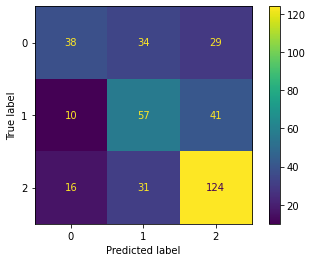

In [108]:
Conf_Matriz = confusion_matrix(d_test,y_hat_test_rl)
disp = ConfusionMatrixDisplay(confusion_matrix = Conf_Matriz)
disp.plot()

Random Forest

In [109]:
floresta = RandomForestClassifier(n_estimators = 300)
floresta.fit(X_train, d_train)

RandomForestClassifier(n_estimators=300)

In [110]:
#Calculando a acurácia do teste (2020)
y_hat_test_floresta = floresta.predict(X_test)
acc = accuracy_score(d_test, y_hat_test_floresta)
f1=f1_score(d_test,y_hat_test_floresta,average = 'micro')
print (f'Acurácia teste (2020):{acc:.3}')
print (f'F1 Score (2020):{f1:.3}')

Acurácia teste (2020):0.582
F1 Score (2020):0.582


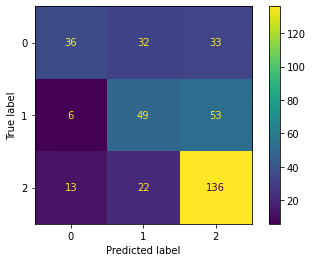

In [111]:
Conf_Matriz = confusion_matrix(d_test,y_hat_test_floresta)
disp = ConfusionMatrixDisplay(confusion_matrix = Conf_Matriz)
disp.plot()

Árvore de decisão

In [112]:
arvore = DecisionTreeClassifier()
arvore.fit(X_train, d_train)

DecisionTreeClassifier()

In [113]:
#Calculando a acurácia do teste (2020)
y_hat_test_arvore = arvore.predict(X_test)
acc = accuracy_score(d_test, y_hat_test_arvore)
f1=f1_score(d_test,y_hat_test_arvore,average = 'micro')
print (f'Acurácia teste (2020):{acc:.3}')
print (f'F1 Score (2020):{f1:.3}')

Acurácia teste (2020):0.511
F1 Score (2020):0.511


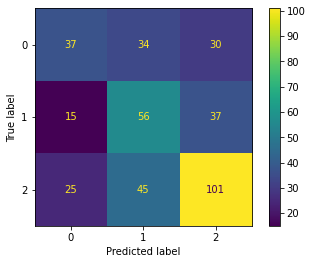

In [114]:
Conf_Matriz = confusion_matrix(d_test,y_hat_test_arvore)
disp = ConfusionMatrixDisplay(confusion_matrix = Conf_Matriz)
disp.plot()

Regressão Logística

In [115]:
pred_table_rl = df_2020['Time_casa']
pred_table_rl = pd.DataFrame(pred_table_rl)
pred_table_rl['Time_visitante'] = df_2020['Time_visitante']
pred_table_rl['Result_mand_real'] = df_2020['Result_mand']
pred_table_rl['Result_mand_previsto'] = y_hat_test_rl
pred_table_rl['Acertou_ou_Errou'] = np.where(pred_table_rl['Result_mand_real']==pred_table_rl['Result_mand_previsto'],'Acertou','Errou')

Random Forest

In [116]:
pred_table_floresta = df_2020['Time_casa']
pred_table_floresta = pd.DataFrame(pred_table_floresta)
pred_table_floresta['Time_visitante'] = df_2020['Time_visitante']
pred_table_floresta['Result_mand_real'] = df_2020['Result_mand']
pred_table_floresta['Result_mand_previsto'] = y_hat_test_floresta
pred_table_floresta['Acertou_ou_Errou'] = np.where(pred_table_floresta['Result_mand_real']==pred_table_floresta['Result_mand_previsto'],'Acertou','Errou')

Árvore de decisão

In [117]:
pred_table_arvore = df_2020['Time_casa']
pred_table_arvore = pd.DataFrame(pred_table_arvore)
pred_table_arvore['Time_visitante'] = df_2020['Time_visitante']
pred_table_arvore['Result_mand_real'] = df_2020['Result_mand']
pred_table_arvore['Result_mand_previsto'] = y_hat_test_arvore
pred_table_arvore['Acertou_ou_Errou'] = np.where(pred_table_arvore['Result_mand_real']==pred_table_arvore['Result_mand_previsto'],'Acertou','Errou')

# Tabela de classificação final de acordo com os modelos de machine learning

In [118]:
display_side_by_side(pontuacao(pred_table_rl),pontuacao(pred_table_floresta),pontuacao(pred_table_arvore), titles=['Regressao Logis','Random Forest','Arvore de decisao'])

Posicao,Time,Pontos
1,Atlético Mineiro,95
2,Internacional,86
3,Flamengo RJ,79
4,São Paulo FC,74
5,Palmeiras,59
6,Fluminense RJ,57
7,Athletico Paranaense,57
8,Santos FC,54
9,Grêmio Porto Alegre,52
10,Vasco da Gama,50


In [120]:
vitoria = df_final.loc[df_final['Result_mand'] == 2]
empate = df_final.loc[df_final['Result_mand'] == 1]
derrota = df_final.loc[df_final['Result_mand'] == 0]

In [121]:
X_vitoria = vitoria.Aproveitamento_mand.values
Y_vitoria = vitoria.Aproveitamento_visit.values
# classe_vitoria = vitoria.Result_mand.values 
X_empate = empate.Aproveitamento_mand.values
Y_empate = empate.Aproveitamento_visit.values
# classe_empate = empate.Result_mand.values
X_derrota = derrota.Aproveitamento_mand.values
Y_derrota = derrota.Aproveitamento_visit.values
# classe_derrota = derrota.Result_mand.values

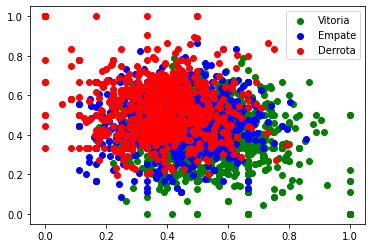

In [122]:
plt.scatter(X_vitoria,Y_vitoria,color = 'green', label = 'Vitoria')
plt.scatter(X_empate,Y_empate,color = 'blue', label = 'Empate')
plt.scatter(X_derrota,Y_derrota,color = 'red', label = 'Derrota')
plt.legend()

In [123]:
Vitoria_mand = len(df_final.loc[df_final['Result_mand'] == 2])
Empate = len(df_final.loc[df_final['Result_mand'] == 1])
Derrota_mand = len(df_final.loc[df_final['Result_mand'] == 0])
partidas = len(df_final)
val=[Vitoria_mand,Derrota_mand,Empate]
win_rate = (float(Vitoria_mand)/(partidas)) *100
empate_rate = (float(Empate)/(partidas)) *100
derrota_rate  = (float(Derrota_mand)/(partidas)) *100
print ('Total de jogos: ', partidas)
print ('Total de jogos ganhos em casa: ', Vitoria_mand)
print ('Total de jogos ganhos pelo visitante: ', Derrota_mand)
print ('Total de jogos empatados: ', Empate)
print ('Percentual de jogos ganhos em casa: {:.2f}%'.format( win_rate ))
print ('Percentual de jogos perdidos em casa: {:.2f}%'.format( derrota_rate ))
print ('Percentual de jogos empatados: {:.2f}%'.format( empate_rate ))


Total de jogos:  3040
Total de jogos ganhos em casa:  1507
Total de jogos ganhos pelo visitante:  728
Total de jogos empatados:  805
Percentual de jogos ganhos em casa: 49.57%
Percentual de jogos perdidos em casa: 23.95%
Percentual de jogos empatados: 26.48%


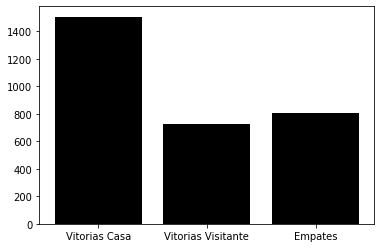

In [124]:
x = np.arange(3)
plt.bar(x, val,color = 'black')
plt.xticks(x, ('Vitorias Casa', 'Vitorias Visitante', 'Empates'))
plt.show()

# Machine learning: vitoria e derrota

In [130]:
df_vd = df_final.loc[(df_final.Result_mand == 2) | (df_final.Result_mand == 0)]

In [132]:
df_vd['Result_mand'] = np.where(df_vd['Result_mand']==2,1,df_vd['Result_mand'])

In [202]:
Result_mand = df_vd['Result_mand']
atributos = df_vd.drop(['Time_casa','Time_visitante','Placar_mand','Placar_visit','Temporada','Result_mand'],1)

In [203]:
#scaler = MinMaxScaler().fit(atributos)
#atrib_norm = scaler.transform(atributos)
scaler = StandardScaler()
atrib_norm = scaler.fit_transform(atributos)
atrib_norm=pd.DataFrame(atrib_norm)
atrib_norm.columns = atributos.columns

In [219]:
prop_test = 0.3
X_train, X_test, d_train, d_test= train_test_split(atrib_norm,Result_mand, test_size = prop_test)

In [228]:
mlp = MLPClassifier(hidden_layer_sizes=(60,50,40),max_iter=5000,activation = 'logistic')

In [229]:
mlp.fit(X_train, d_train)
previsao = mlp.predict(X_test)
acc = accuracy_score(d_test, previsao)
print (f'Acurácia: {acc:.3}')

Acurácia: 0.796


In [217]:
model_reg_logistic = LogisticRegression()

In [218]:
model_reg_logistic.fit(X_train, d_train)
previsao = model_reg_logistic.predict(X_test)
acc = accuracy_score(d_test, previsao)
print (f'Acurácia: {acc:.3}')

Acurácia: 0.773


In [231]:
import pickle
filename = 'mlp_rodada.sav'
pickle.dump(mlp, open(filename, 'wb'))